Stock Market Analysis + Prediction using LSTM

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, you will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). you will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. you will look at a few ways of analyzing the risk of a stock, based on its previous performance history. you will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

you'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks'?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE or whatever you like inc using LSTM)

Getting the Data
The first step is to get the data and load it to memory. You will get the stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, you will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance:https://aroussi.com/post/python-yahoo-finance
You are free to use any other source if you want.

1. What was the change in price of the stock overtime?
In this section you'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.
Please run the cell Below

Remeber to run the cells that are coded already. You need to write or fill codes where you are supposed to . For some cells you are given the sample output. Dont run those cells or otherwise you will loose the hints.

In [2]:
# 1. Import the necessary libraries: pandas, numpy, matplotlib.pyplot, seaborn, yfinance, and datetime.
# Install them if already not
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime

# 2. Define a list of tech stocks (e.g., ['AAPL', 'GOOG', 'MSFT', 'AMZN']).
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# 3. Set up the end and start times for data retrieval. End time should be the current date, and start time should be one year ago from the end date.
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# 4. Use a for loop to download historical stock data for each company in the tech stock list.
for stock in tech_list:
    # a. Inside the loop, use yf.download() to fetch historical stock data for the current 'stock' in the loop.
    # b. Assign the result to a variable (e.g., stock_data).
    # c. Specify the start and end dates using the 'start' and 'end' variables.
    # d. Use globals() to dynamically create variables for each stock (e.g., AAPL, GOOG) and store the fetched data.
    globals()[stock] = yf.download(stock, start, end)

# 5. Create a list of company DataFrames (e.g., company_list) and a corresponding list of company names (e.g., ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']).
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# 6. Use a for loop to assign the company name to each stock's DataFrame.
for company, com_name in zip(company_list, company_name):
    # a. Iterate through company_list and company_name simultaneously using zip.
    # b. For each iteration, add a new column 'company_name' to the 'company' DataFrame and set its value to 'com_name'.
    company["company_name"] = com_name

# 7. Concatenate the DataFrames in company_list along the axis 0 (rows) and store the result in a variable (e.g., df).
df = pd.concat(company_list, axis=0)

# 8. Display the last 10 rows of the concatenated DataFrame.
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-01-08,146.740005,149.399994,146.149994,149.100006,149.100006,46757100,AMAZON
2024-01-09,148.330002,151.710007,148.210007,151.369995,151.369995,43812600,AMAZON
2024-01-10,152.059998,154.419998,151.880005,153.729996,153.729996,44421800,AMAZON
2024-01-11,155.039993,157.169998,153.119995,155.179993,155.179993,49072700,AMAZON
2024-01-12,155.389999,156.199997,154.009995,154.619995,154.619995,40460300,AMAZON
2024-01-16,153.529999,154.990005,152.149994,153.160004,153.160004,41384600,AMAZON
2024-01-17,151.490005,152.149994,149.910004,151.710007,151.710007,34953400,AMAZON
2024-01-18,152.770004,153.779999,151.820007,153.500000,153.500000,37850200,AMAZON
2024-01-19,153.830002,155.759995,152.740005,155.339996,155.339996,51033700,AMAZON


Descriptive Statistics about the Data
.describe() generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Run the cells below for more detail.

In [3]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,175.078009,176.669124,173.829960,175.400797,175.012545,5.829482e+07
std,14.853841,14.608164,14.800239,14.631306,14.805027,1.738732e+07
min,138.119995,142.429993,137.899994,141.110001,140.325638,2.404830e+07
25%,165.190002,166.939995,164.800003,165.979996,165.309425,4.747480e+07
50%,177.059998,179.050003,176.009995,177.449997,177.216522,5.441290e+07
75%,187.769997,188.985001,186.065002,187.939995,187.569267,6.528460e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


Look we have only 255 records in one year because weekends are not included in the data.

Information About the Data
.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-01-23 to 2024-01-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.
Code the blank places

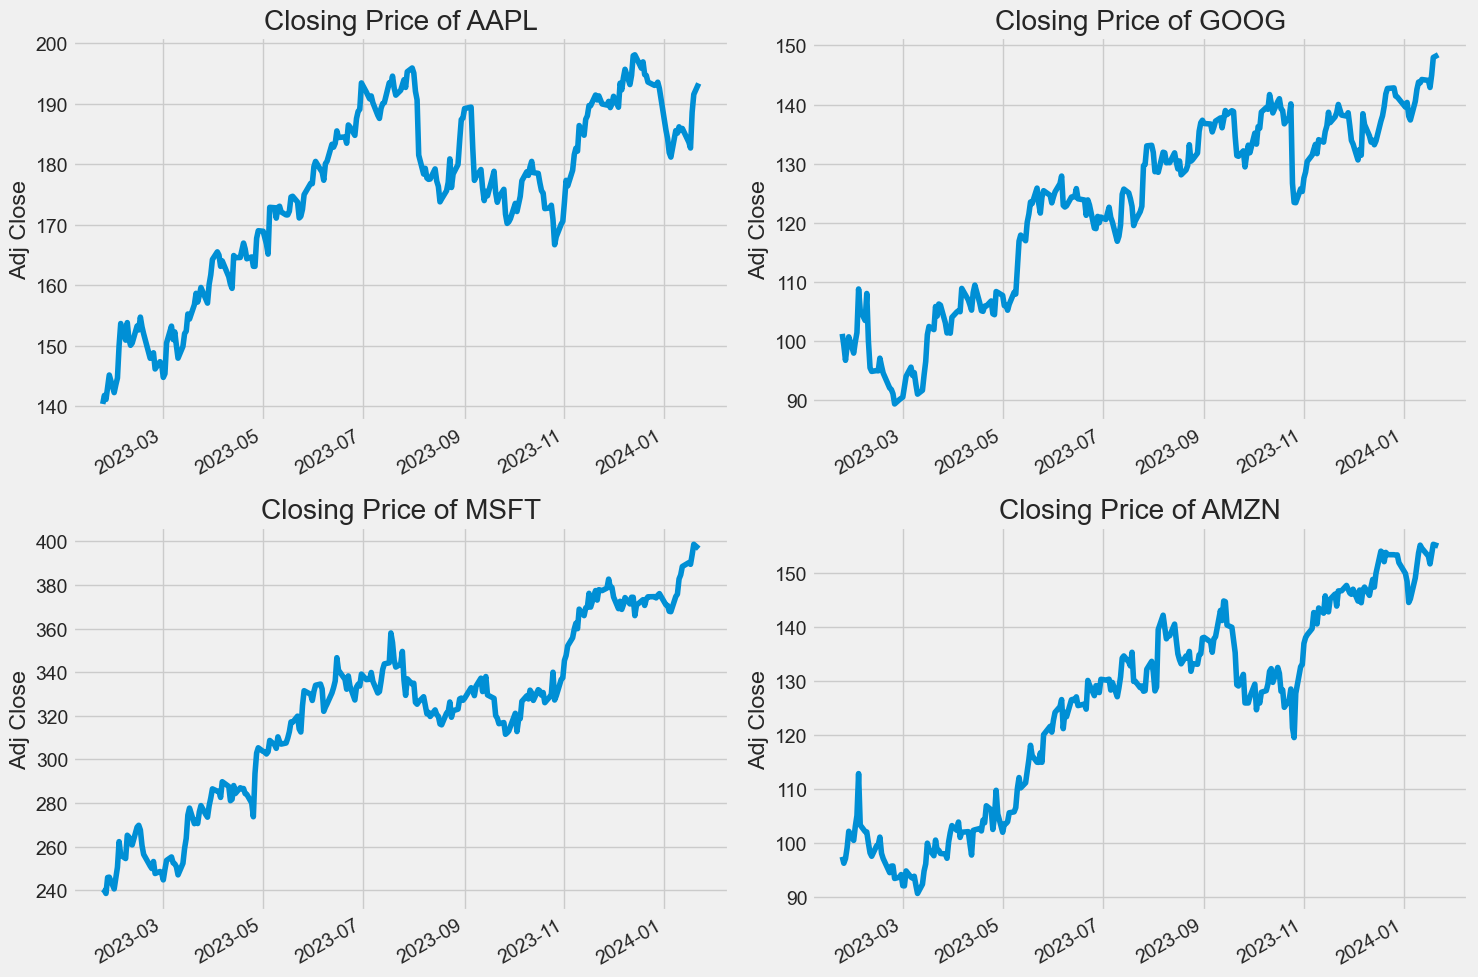

In [5]:
# 1. Create a figure with a size of (15, 10).
#Code Here#
plt.figure(figsize=(15,10))

# 2. Adjust subplot parameters to provide extra space at the top.
plt.subplots_adjust(top=1.25, bottom=1.2)
# 3. Iterate over the company_list:
#    a. Create subplots in a 2x2 grid.
#    b. Plot the 'Adj Close' column of the current company's DataFrame.
#    c. Set y-axis label to 'Adj Close'.
#    d. Remove x-axis label.
#    e. Set subplot title dynamically based on the tech stock.
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i ) #fill the blanks
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
# 4. Adjust layout for better visualization.
plt.tight_layout()

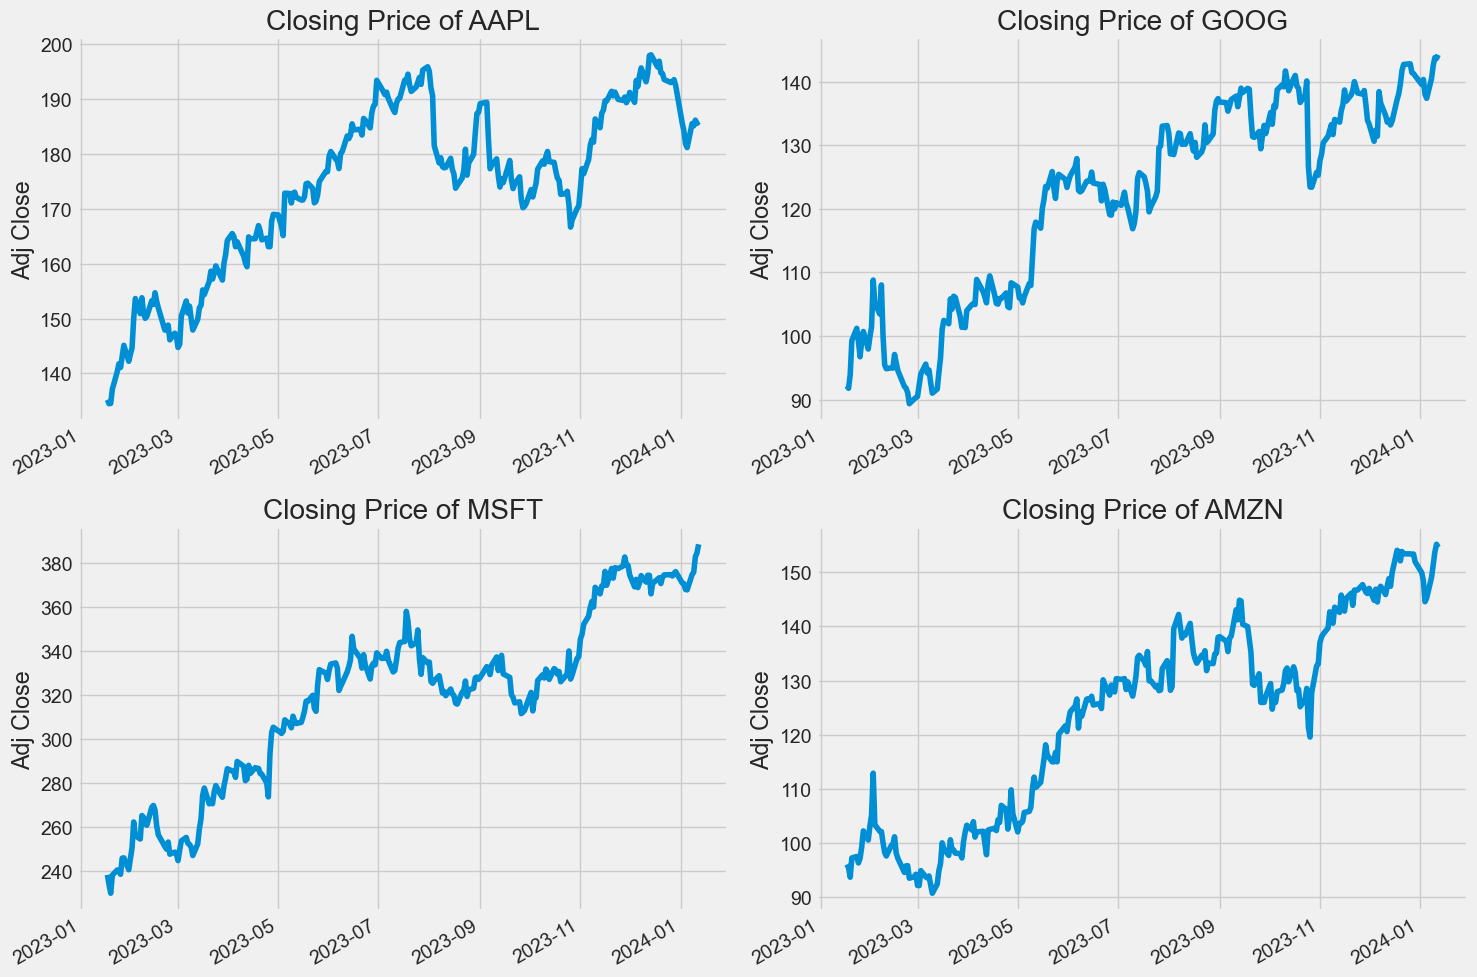

In [7]:
# dont do anything the output of the previous cell will be like the cell below

Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

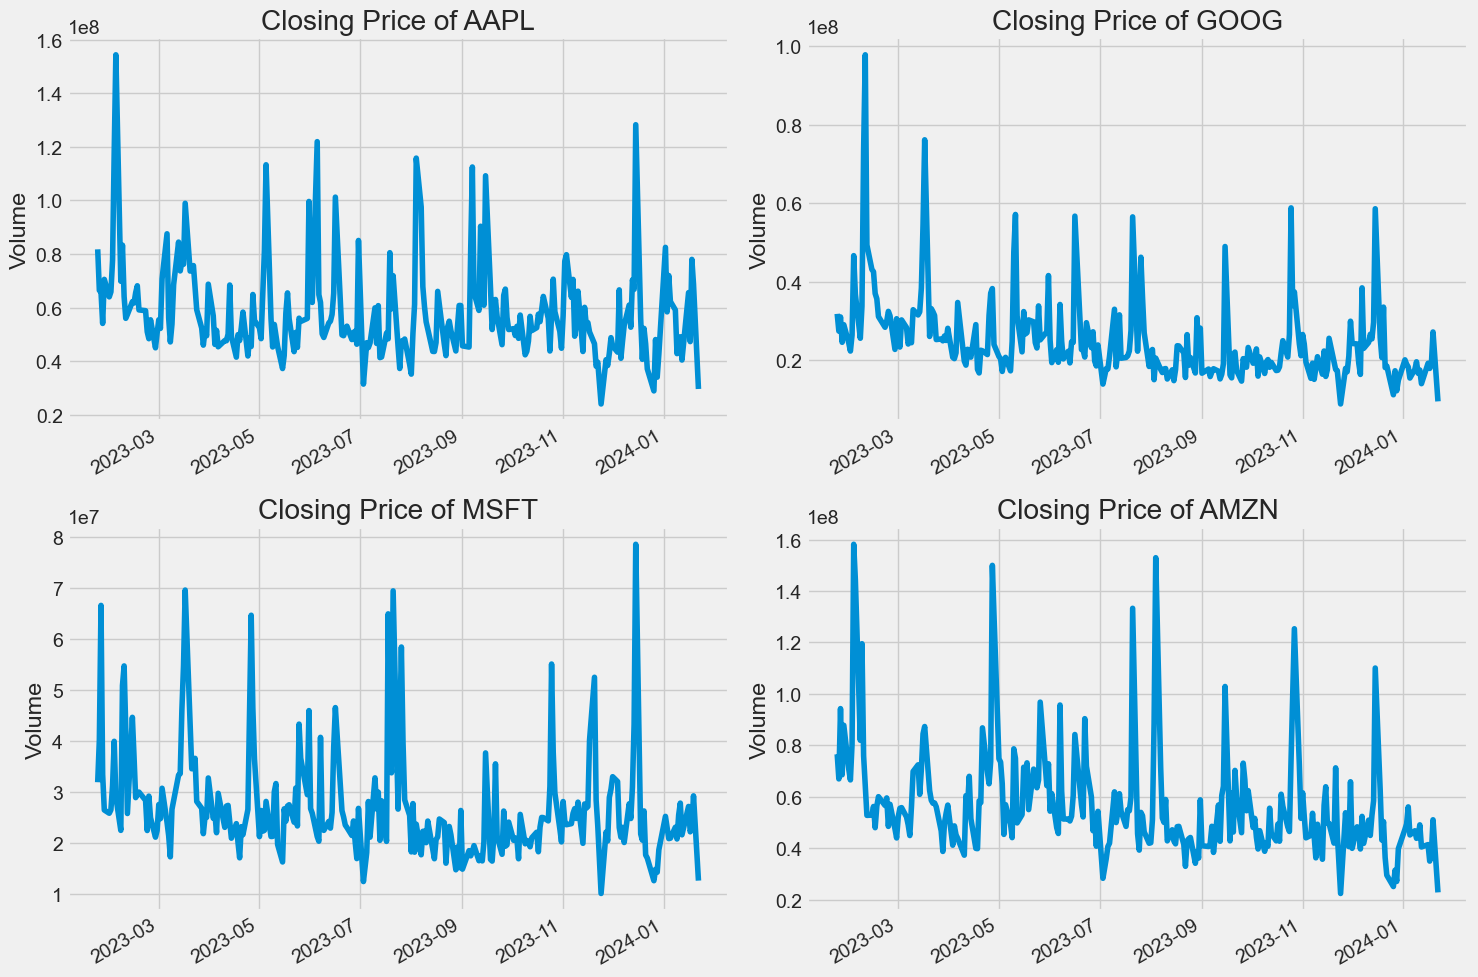

In [6]:
# do the same plotting for Volume as done for Adj Close
#code here#

plt.figure(figsize=(15,10))

plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i) #fill the blanks
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
# 4. Adjust layout for better visualization.
plt.tight_layout()

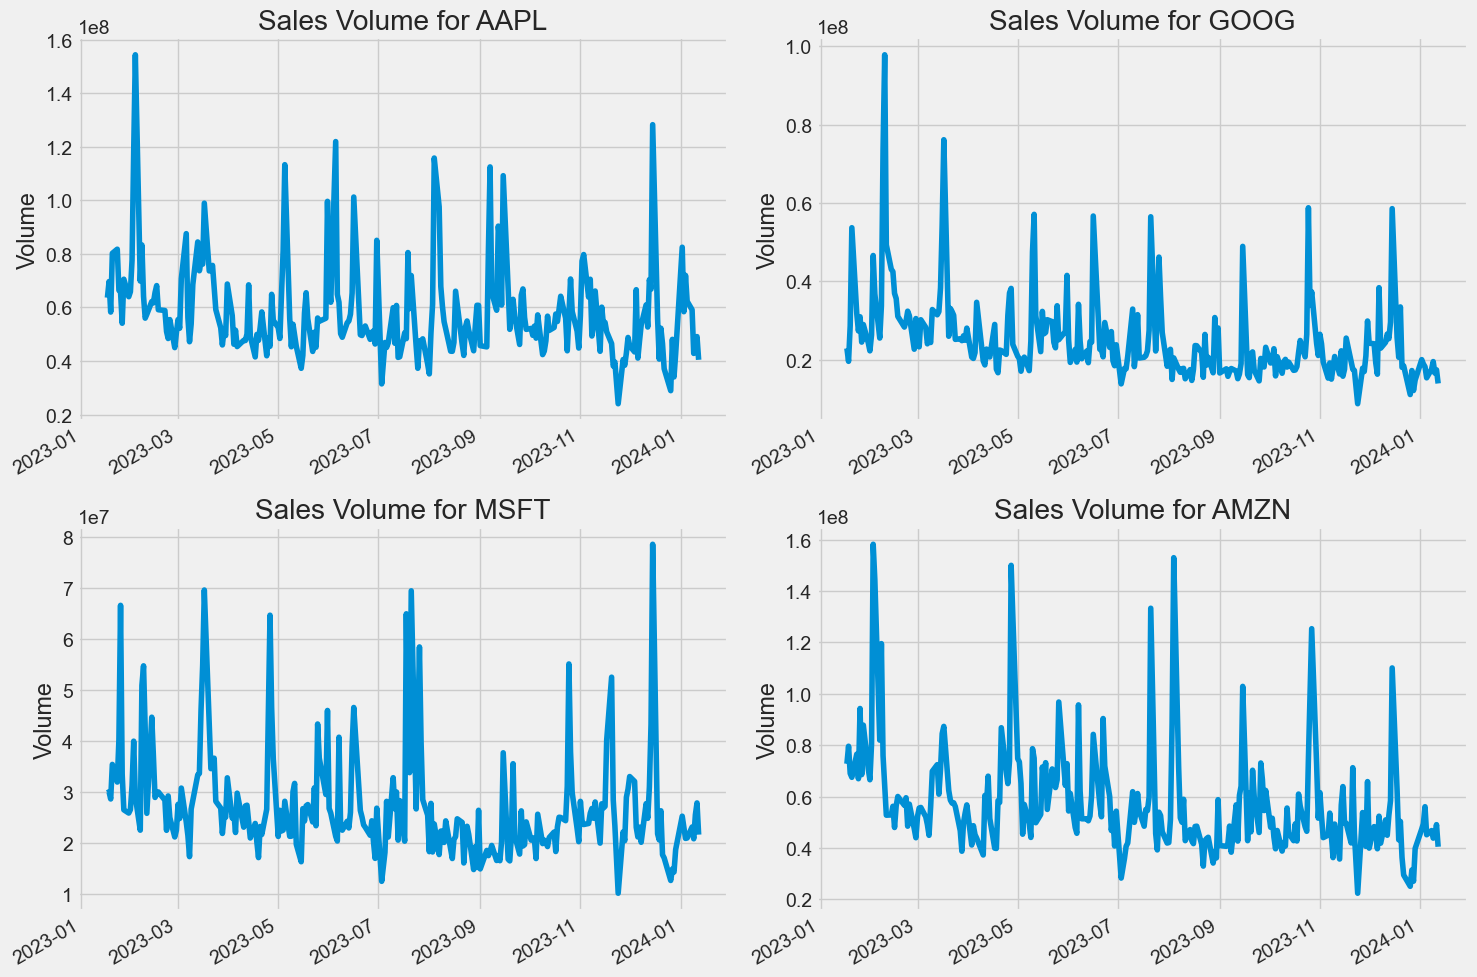

In [8]:
#sample output

2. What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

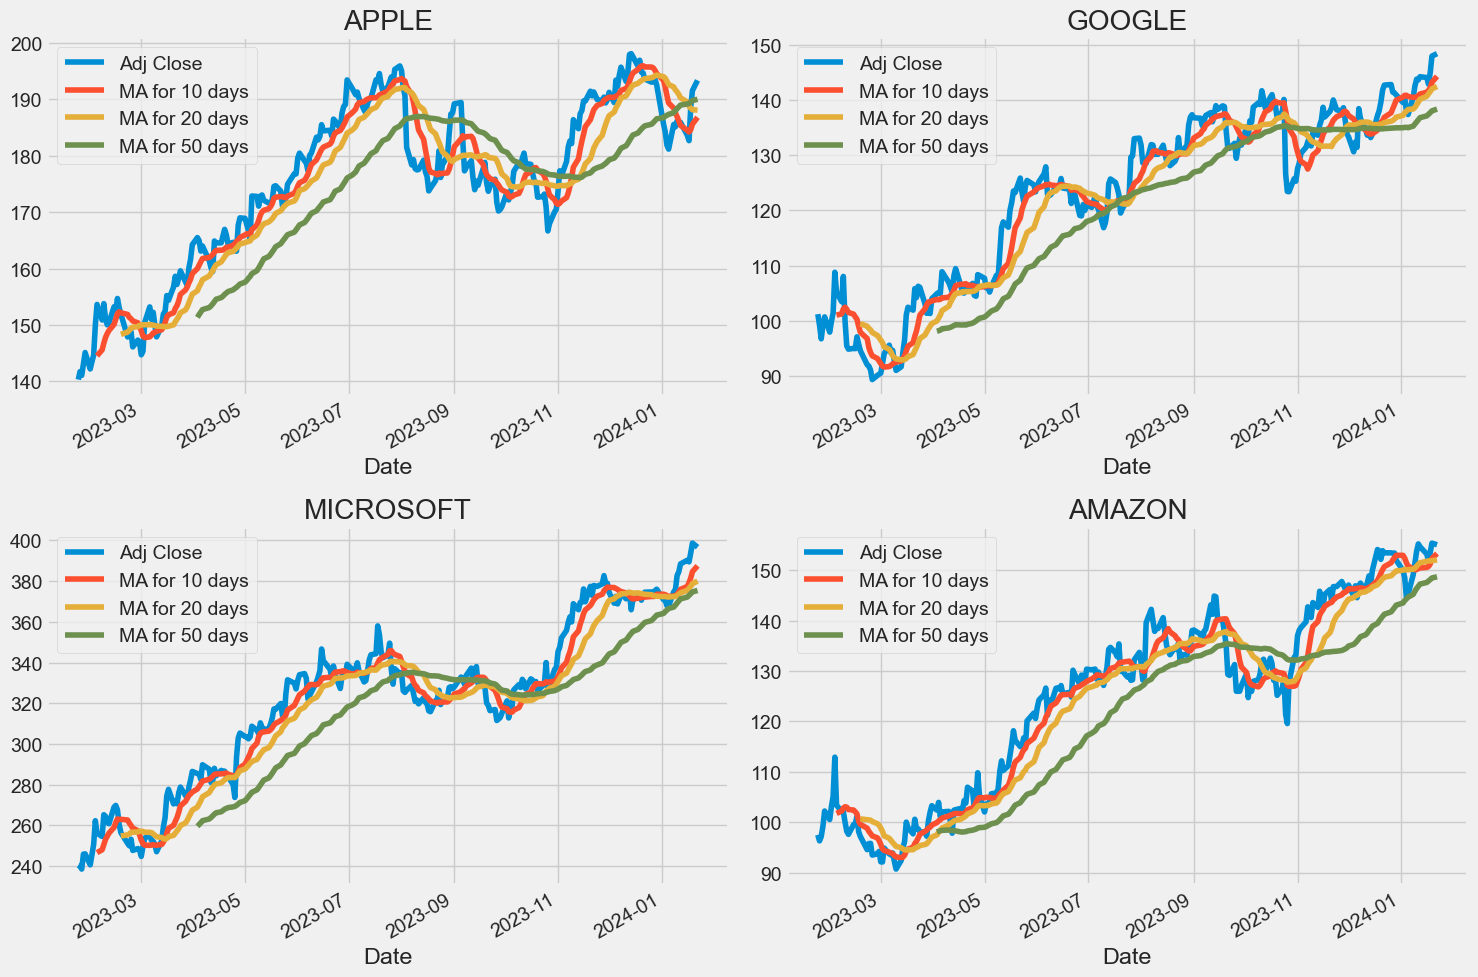

In [7]:
ma_day = [10, 20, 50]
# 1. For each specified moving average (ma_day), calculate the moving average for the 'Adj Close' column of each company.
#    a. Use nested loops: one for iterating over ma_day and another for iterating over company_list.
#    b. For each company, create a new column with the moving average for the given ma_day.

#code here#

for i in ma_day:
    for j in company_list:
        column_name = f'MA for {i} days'
        j[column_name] = j['Adj Close'].rolling(i).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

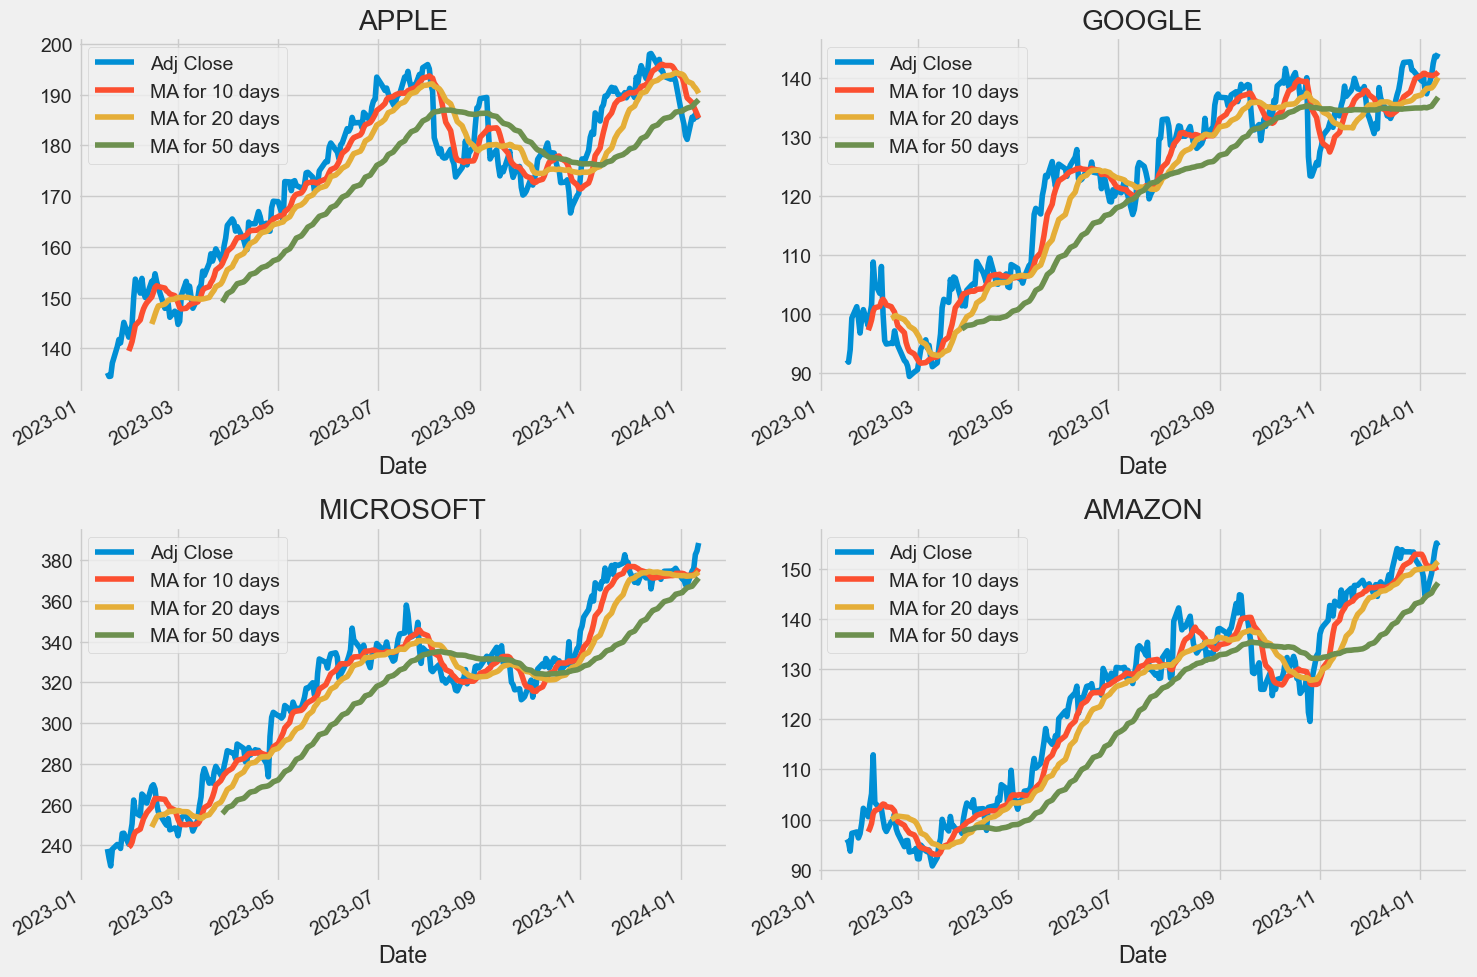

In [9]:
#sample output

3. What was the daily return of the stock on average?
Now that you've done some baseline analysis, let's go ahead and dive a little deeper. You're now going to analyze the risk of the stock. In order to do so You'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

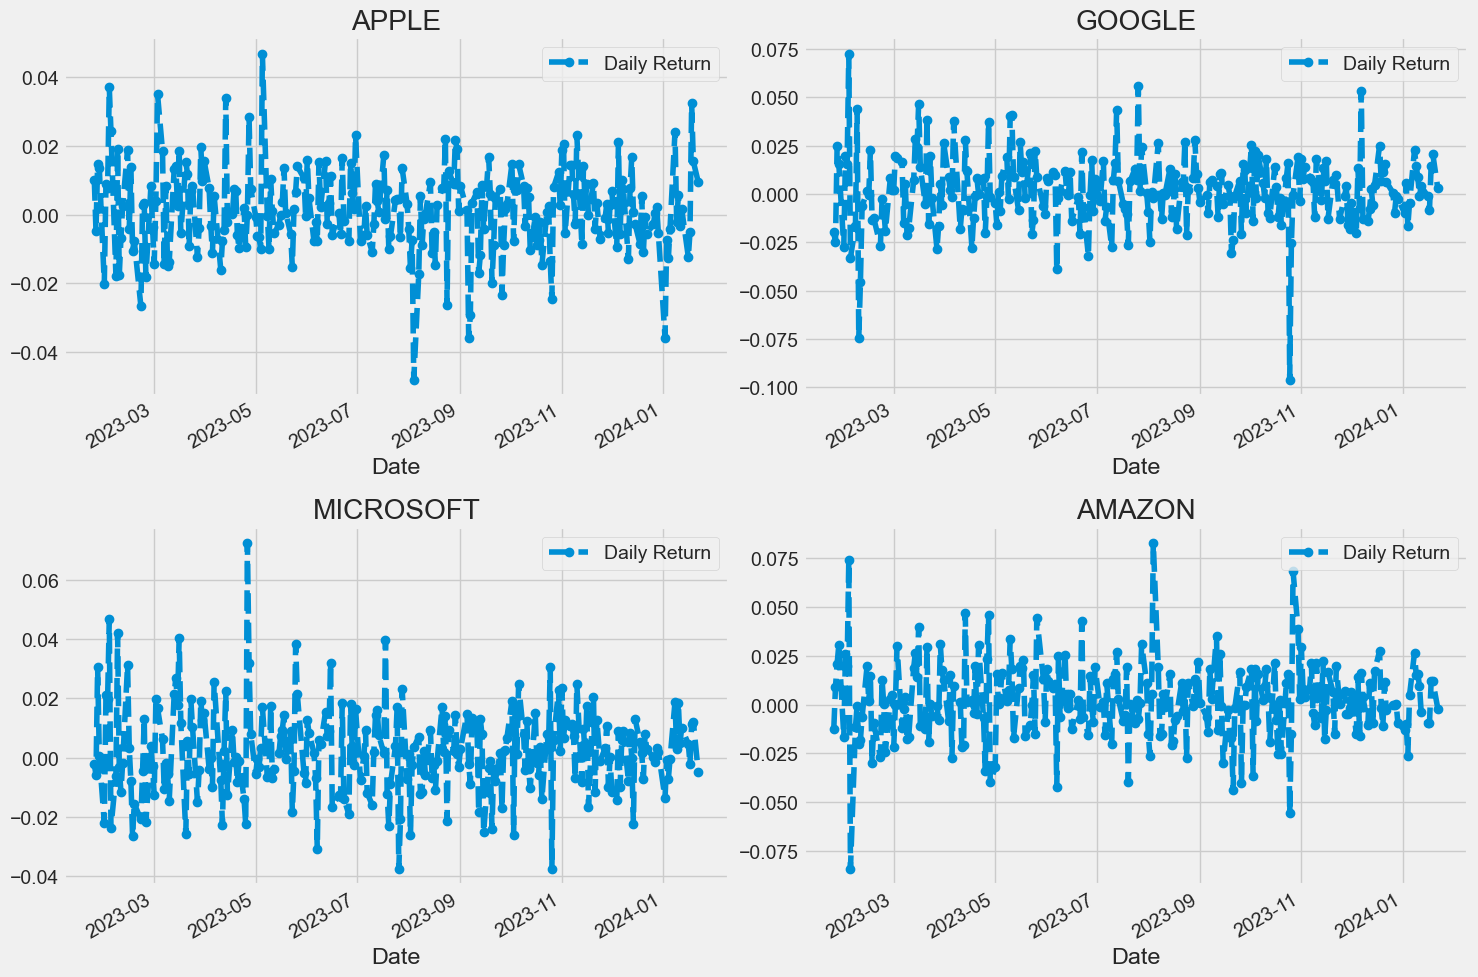

In [8]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. You'll use seaborn to create both a histogram and kde plot on the same figure.

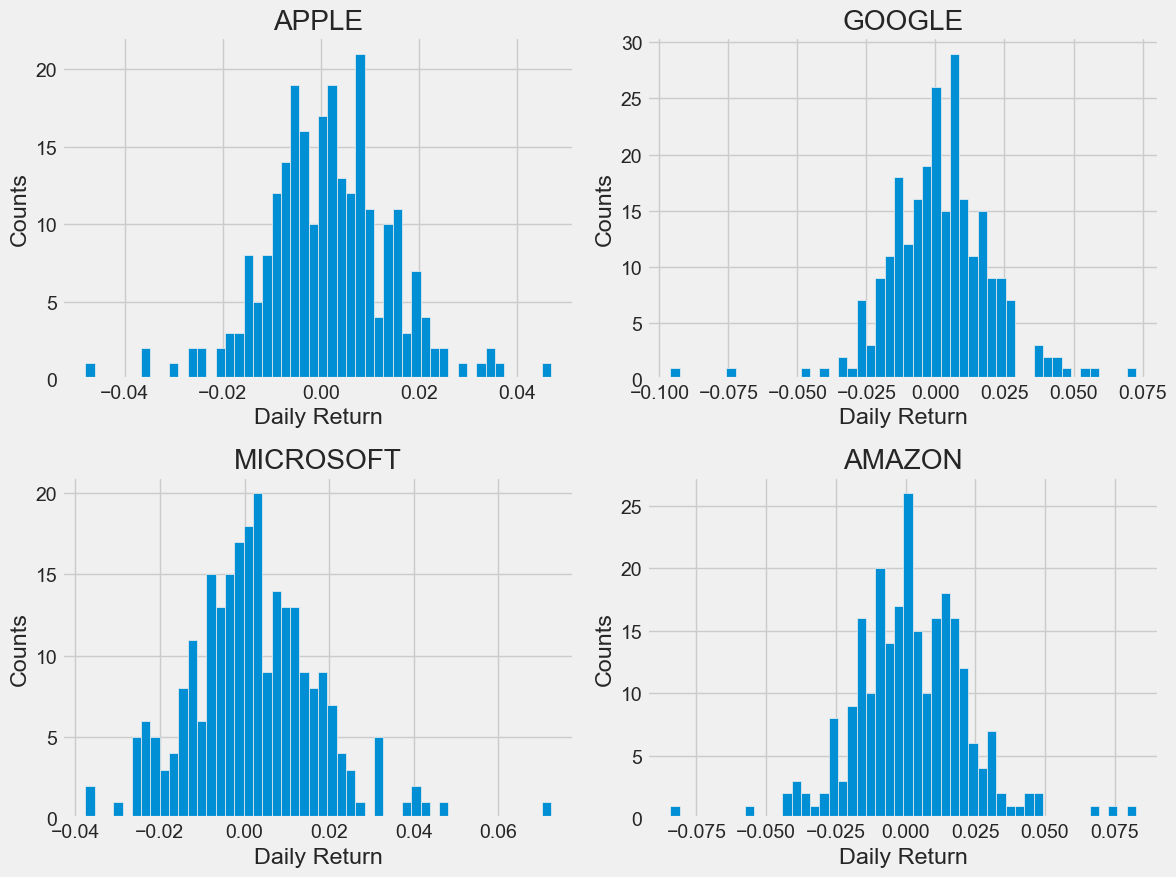

In [9]:
plt.figure(figsize=(12, 9))
# 2. Use a for loop to iterate over the company_list:
#    a. Create subplots in a 2x2 grid.
#    b. Plot the histogram of daily returns for the current company using company['Daily Return'].hist(bins=50).
#    c. Set the x-axis label to 'Daily Return' using plt.xlabel('Daily Return').
#    d. Set the y-axis label to 'Counts' using plt.ylabel('Counts').
#    e. Set the title of the subplot to the company name dynamically based on the iteration.

#Code here#
    
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)

    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(company_name[i-1])

plt.tight_layout()

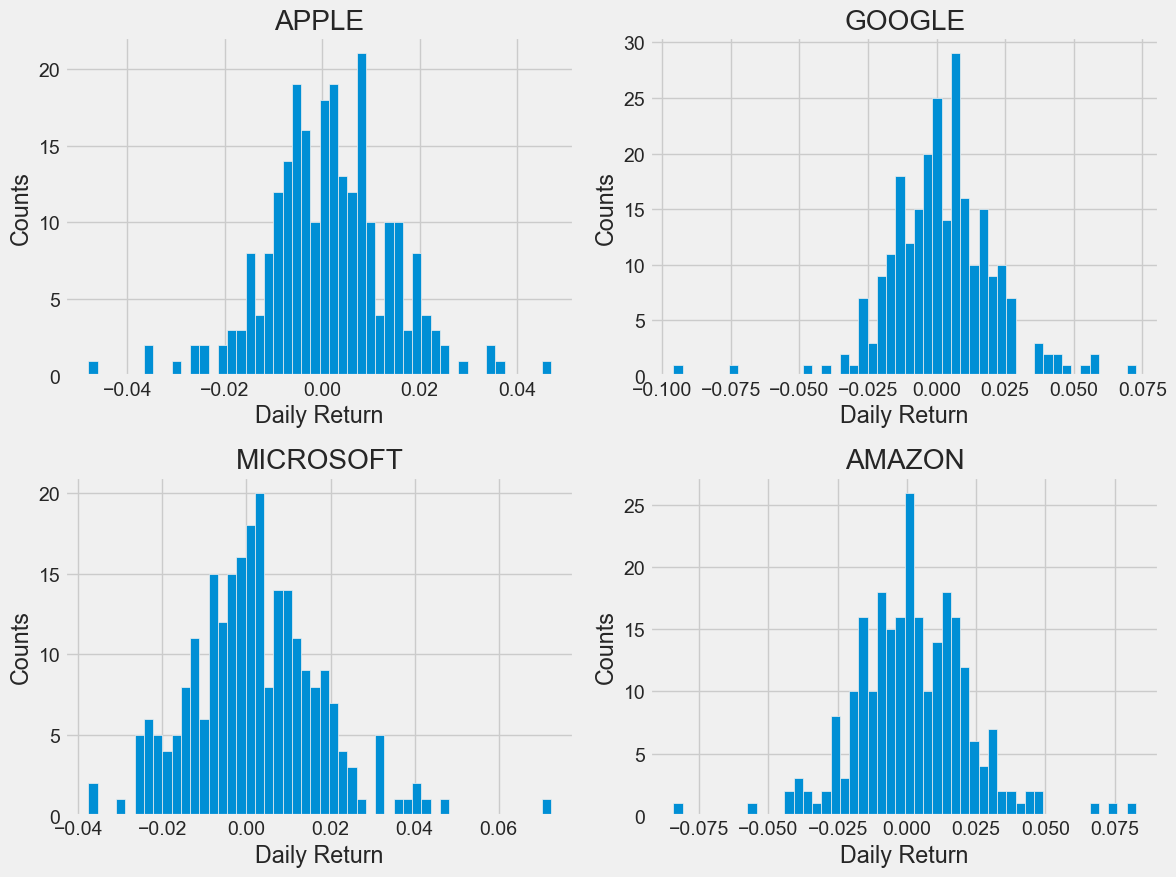

In [11]:
# Sample output

4. What was the correlation between different stocks closing prices?
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-23,NaN,NaN,NaN,NaN
2023-01-24,0.010063,-0.012305,-0.019761,-0.002226
2023-01-25,-0.004701,0.008929,-0.024997,-0.005908
2023-01-26,0.014803,0.020992,0.025121,0.030714
2023-01-27,0.013684,0.030437,0.015631,0.000645


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

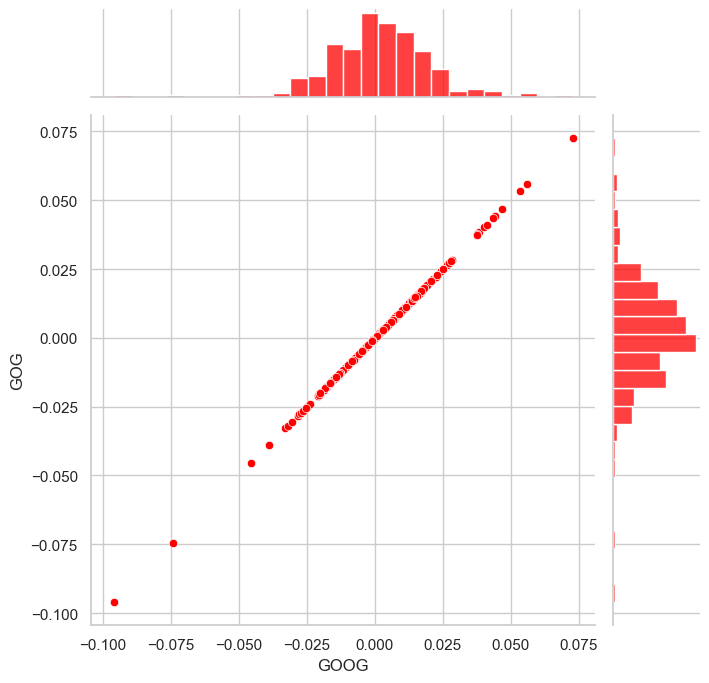

In [11]:
# Compare Google to itself should show a perfectly linear relationship
#Code here 

GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()


sns.set(style="whitegrid")
g = sns.JointGrid(data=GOOG, x='Daily Return', y='Daily Return', height=7)
g = g.plot(sns.scatterplot, sns.histplot, color='red')
g.set_axis_labels('GOOG', 'GOG')
plt.show()

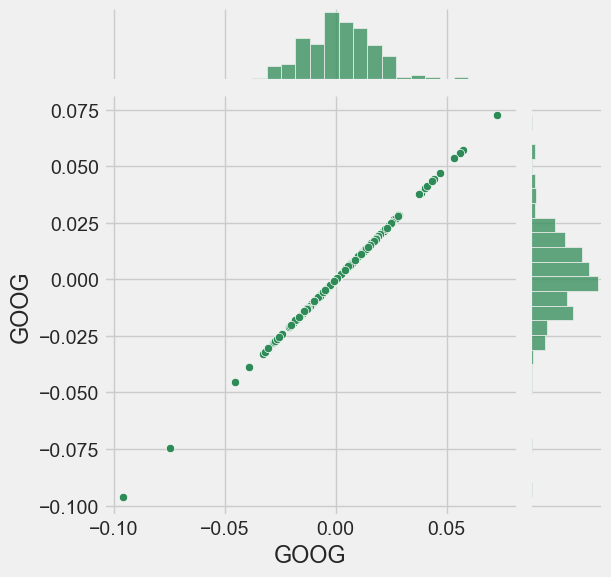

In [13]:
#Sample output here

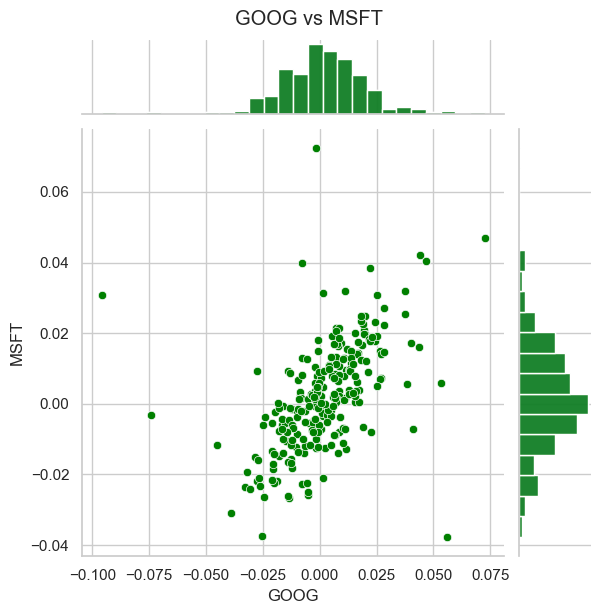

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
# Code here

GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()


data = pd.concat([GOOG['Daily Return'], MSFT['Daily Return']], axis=1, keys=['GOOG', 'MSFT'])


sns.set(style="whitegrid")
g = sns.jointplot(data = data, x='GOOG', y='MSFT', height=6)

g = g.plot(sns.scatterplot, sns.histplot, color='green')


g.set_axis_labels('GOOG', 'MSFT')

g.fig.suptitle('GOOG vs MSFT', y=1.02)

plt.show()

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

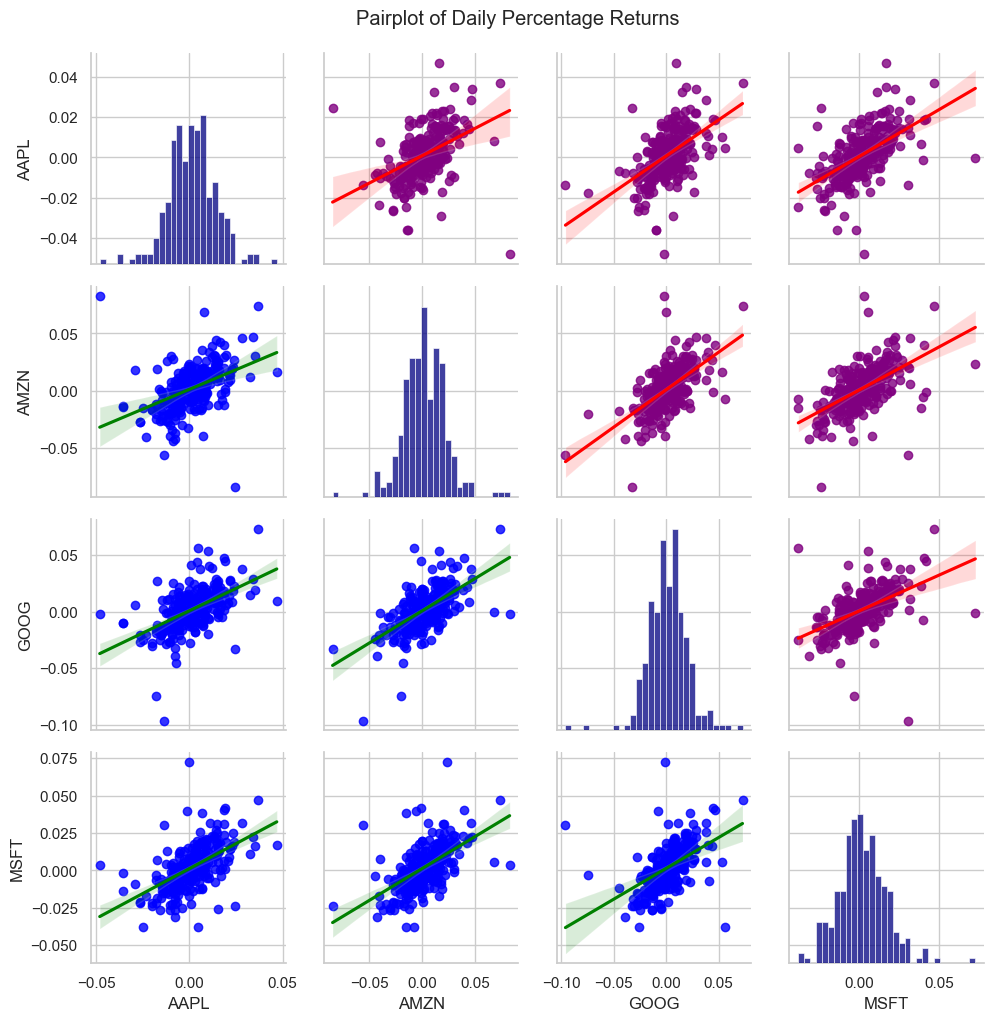

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

# Code here

for stock in [AAPL, AMZN, GOOG, MSFT]:
    stock['Daily Return'] = stock['Adj Close'].pct_change()

combined_data = pd.concat([AAPL['Daily Return'], AMZN['Daily Return'], GOOG['Daily Return'], MSFT['Daily Return']], axis=1, keys=['AAPL', 'AMZN', 'GOOG', 'MSFT'])


return_fig = sns.PairGrid(combined_data)

return_fig.map_upper(sns.regplot, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})

return_fig.map_lower(sns.regplot, scatter_kws={'color': 'blue'}, line_kws={'color': 'green'})

return_fig.map_diag(sns.histplot, bins=30, color='navy')



plt.suptitle('Pairplot of Daily Percentage Returns', y=1.02)
plt.show()

C:\Users\AMIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


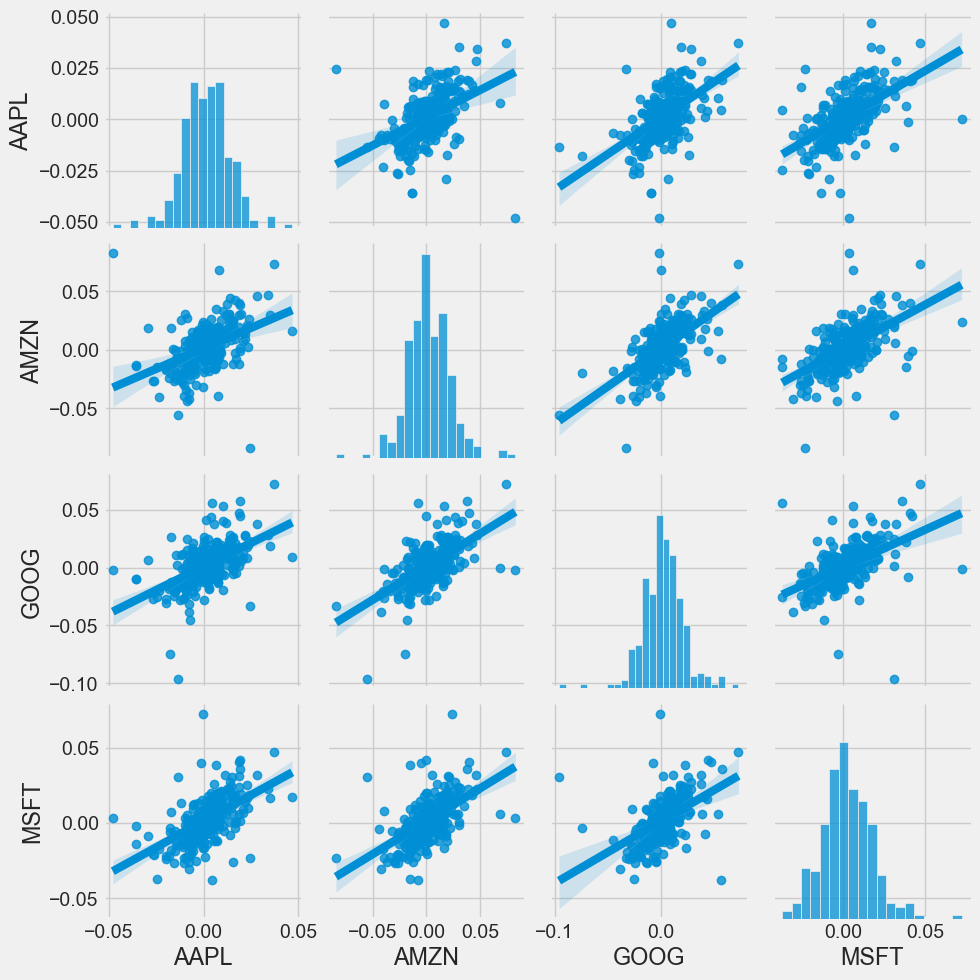

In [14]:
# Sample output here

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

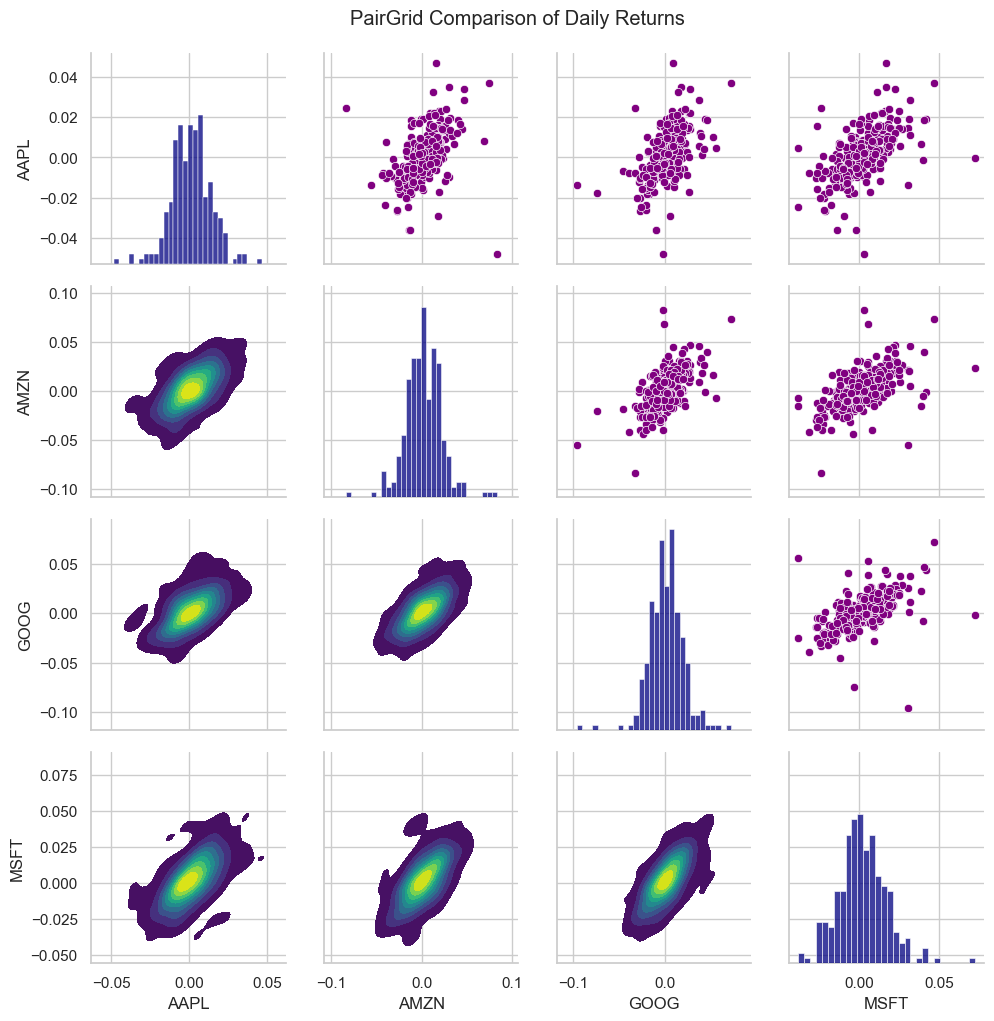

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame


# Using map_upper we can specify what the upper triangle will look like.


# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)


# Finally we'll define the diagonal as a series of histogram plots of the daily return

for stock in [AAPL, AMZN, GOOG, MSFT]:
    stock['Daily Return'] = stock['Adj Close'].pct_change()

combined_data = pd.concat([AAPL['Daily Return'], AMZN['Daily Return'], GOOG['Daily Return'], MSFT['Daily Return']], axis=1, keys=['AAPL', 'AMZN', 'GOOG', 'MSFT'])

returns_fig = sns.PairGrid(combined_data)


returns_fig.map_upper(sns.scatterplot, color='purple')


returns_fig.map_lower(sns.kdeplot, cmap='viridis', fill=True)


returns_fig.map_diag(sns.histplot, bins=30, color='navy')


returns_fig.fig.suptitle('PairGrid Comparison of Daily Returns', y=1.02)

plt.show()

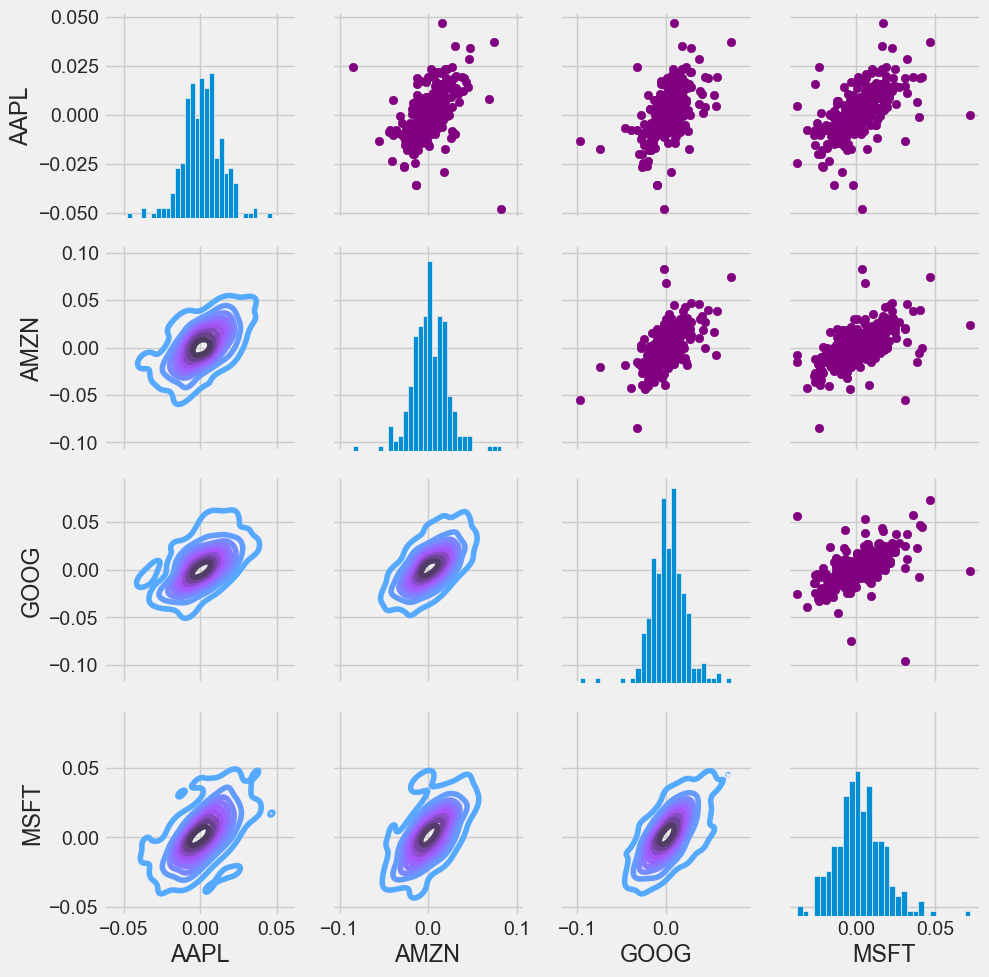

In [15]:
# Sample here

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame


# Using map_upper we can specify what the upper triangle will look like.


# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)


# Finally we'll define the diagonal as a series of histogram plots of the daily return



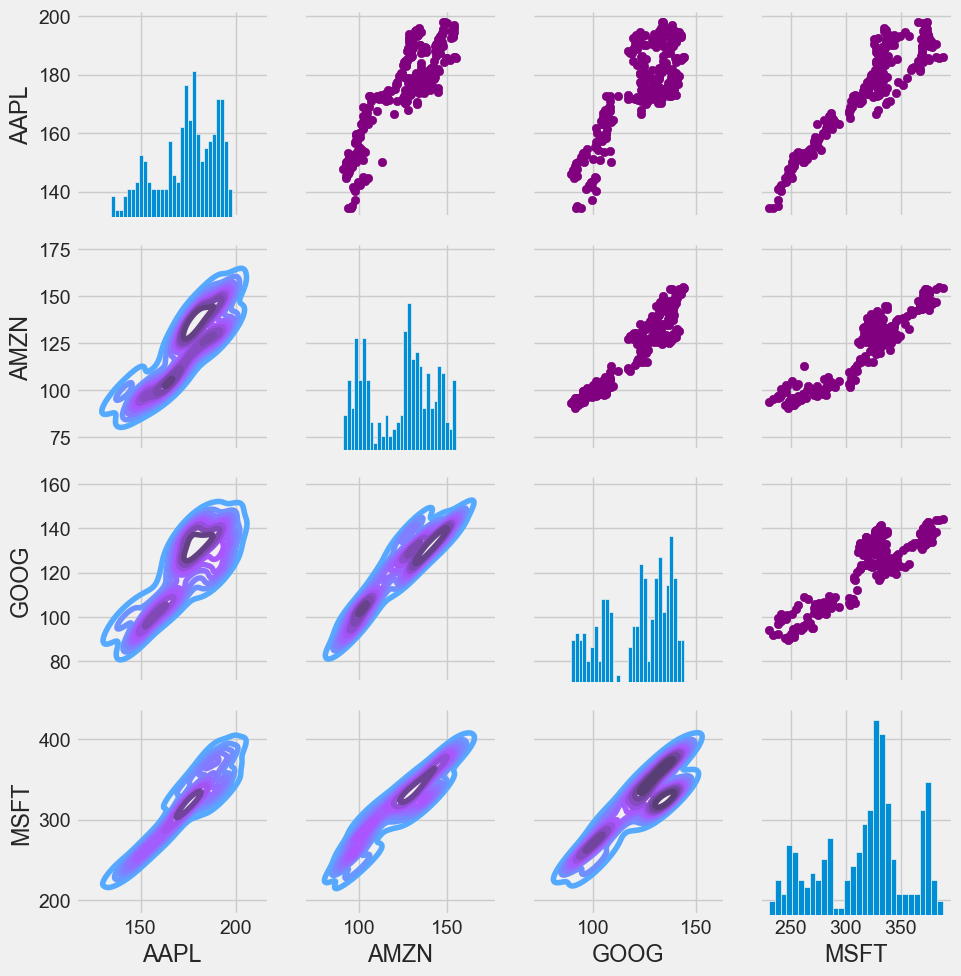

In [16]:
# sample here 

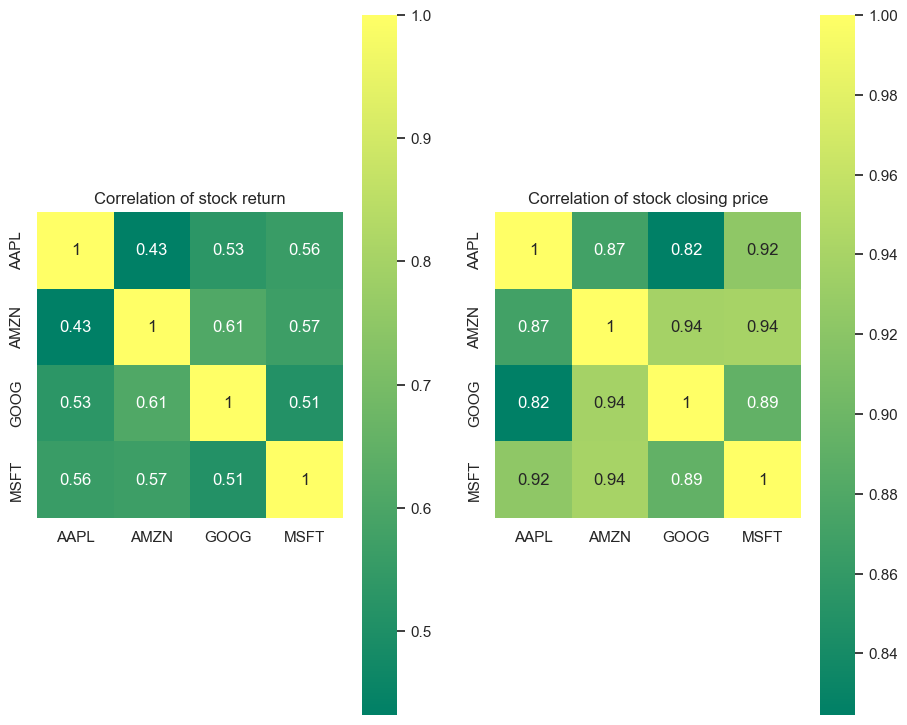

In [15]:
# 1. Create a figure with a size of (12, 10).
# 2. Use subplots to display two correlation heatmaps side by side.

# For the first subplot:
# 3. Create a heatmap of the correlation matrix for daily stock returns using sns.heatmap().
#    a. Set the data to tech_rets.corr().
#    b. Enable annotations with annot=True.
#    c. Use the 'summer' colormap for better visualization.
# 4. Set the title of the subplot to 'Correlation of stock return'.

# For the second subplot:
# 5. Create a heatmap of the correlation matrix for stock closing prices using sns.heatmap().
#    a. Set the data to closing_df.corr().
#    b. Enable annotations with annot=True.
#    c. Use the 'summer' colormap for better visualization.
# 6. Set the title of the subplot to 'Correlation of stock closing price'.

# 7. Adjust the layout for better visualization.

tech_rets = pd.concat([AAPL['Daily Return'], AMZN['Daily Return'], GOOG['Daily Return'], MSFT['Daily Return']], axis=1).dropna()
closing_df = pd.concat([AAPL['Adj Close'], AMZN['Adj Close'], GOOG['Adj Close'], MSFT['Adj Close']], axis=1).dropna()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))

stock_symbols = ['AAPL', 'AMZN', 'GOOG', 'MSFT']

# First subplot: Correlation of stock return
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer', ax=axes[0], square=True, xticklabels=stock_symbols, yticklabels=stock_symbols)
axes[0].set_title('Correlation of stock return')

# Second subplot: Correlation of stock closing price
sns.heatmap(closing_df.corr(), annot=True, cmap='summer', ax=axes[1], square=True, xticklabels=stock_symbols, yticklabels=stock_symbols)
axes[1].set_title('Correlation of stock closing price')


plt.subplots_adjust(left=0.1, right=0.8, top=0.8, bottom=0.1)


plt.show()


Text(0.5, 1.0, 'Correlation of stock closing price')

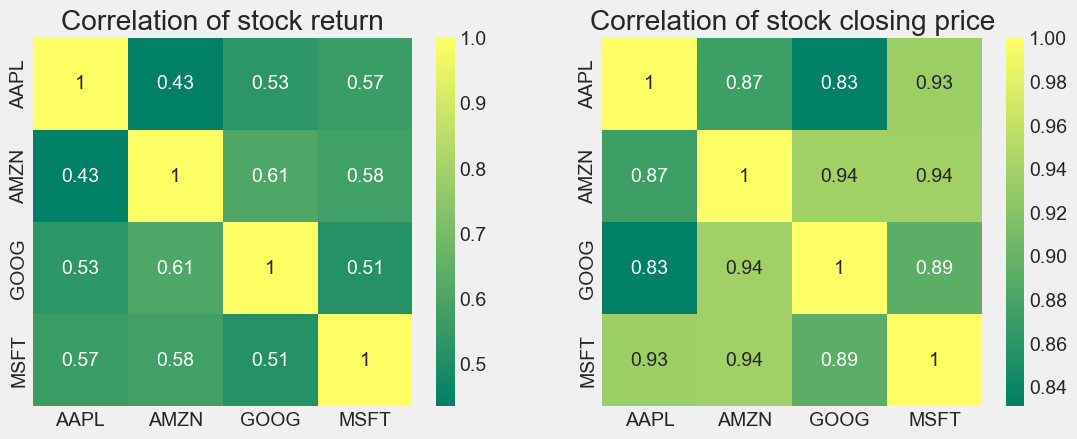

In [17]:
# Sample here

5. How much value do we put at risk by investing in a particular stock?
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

C:\Users\Dell\AppData\Local\Temp\ipykernel_2648\3441002835.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(rets.mean(), rets.std(), s=area, c='red', cmap='viridis', label=tech_rets.columns)


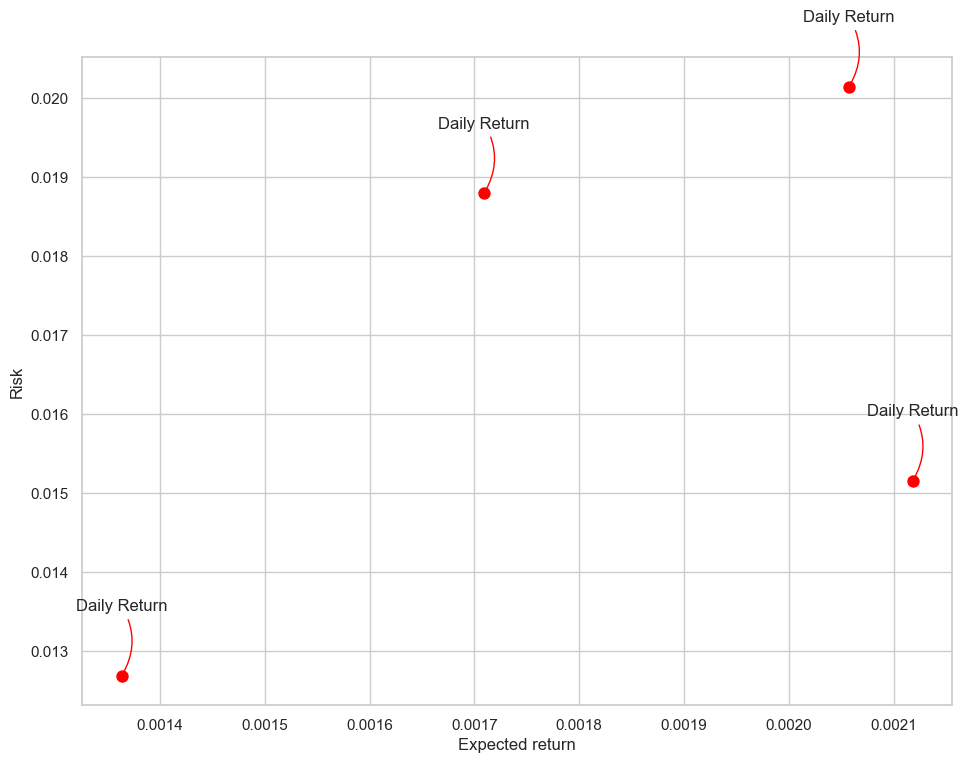

In [16]:
# 1. Drop any NaN values from the tech_rets DataFrame and store the result in rets.


# 2. Calculate the area for the scatter plot using the formula: area = np.pi * 20.


# 3. Create a figure with a size of (10, 8).


# 4. Use plt.scatter() to create a scatter plot.
#    a. Set 'rets.mean()' as the x-axis values and 'rets.std()' as the y-axis values.
#    b. Set the marker size to 'area'.


# 5. Set the x-axis label to 'Expected return' and the y-axis label to 'Risk'.


# 6.  Iterate over the columns of the rets DataFrame using a for loop with zip.
#    a. For each iteration, extract the label, mean, and standard deviation using 'rets.columns', 'rets.mean()', and 'rets.std()'.
#    b. Use plt.annotate() to add labels at the specified coordinates (x, y).
#    c. Set the label text, position, and style.
#    d. Customize the annotation by adjusting xytext, textcoords, ha, va, and arrowprops parameters.

rets = tech_rets.dropna()


area = np.pi * 20

colors = tech_rets.mean()

plt.figure(figsize=(10, 8))


plt.scatter(rets.mean(), rets.std(), s=area, c='red', cmap='viridis', label=tech_rets.columns)


plt.xlabel('Expected return')
plt.ylabel('Risk')



for label, mean, std in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,
                 xy=(mean, std),
                 xytext=(0, 50),  # Adjust the distance of the label from the point
                 textcoords='offset points',
                 ha='center',
                 va='center',
                 arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3', color='red') )

# Show the plot
plt.show()



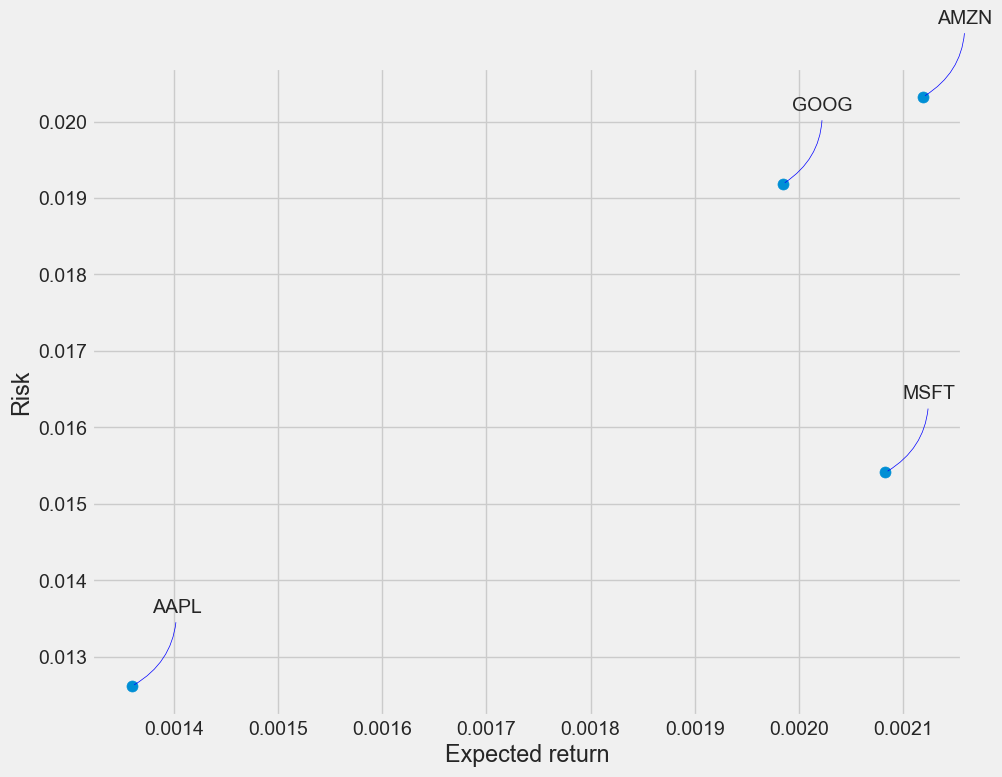

In [18]:
# Sample here 

6. Predicting the closing price stock price of APPLE inc:

In [17]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449690,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516595,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655558,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787855,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767572,394024400
...,...,...,...,...,...,...
2024-01-16,182.160004,184.259995,180.929993,183.630005,183.630005,65603000
2024-01-17,181.270004,182.929993,180.300003,182.679993,182.679993,47317400
2024-01-18,186.089996,189.139999,185.830002,188.630005,188.630005,78005800


In [ ]:
# 1. Create a figure with a size of (16, 6).


# 2. Set the title of the plot to 'Close Price History' using plt.title().


# 3. Plot the 'Close' column of the df DataFrame using plt.plot().


# 4. Set the x-axis label to 'Date' and y-axis label to 'Close Price USD ($)' using plt.xlabel() and plt.ylabel().


# 5. Display the plot using plt.show().


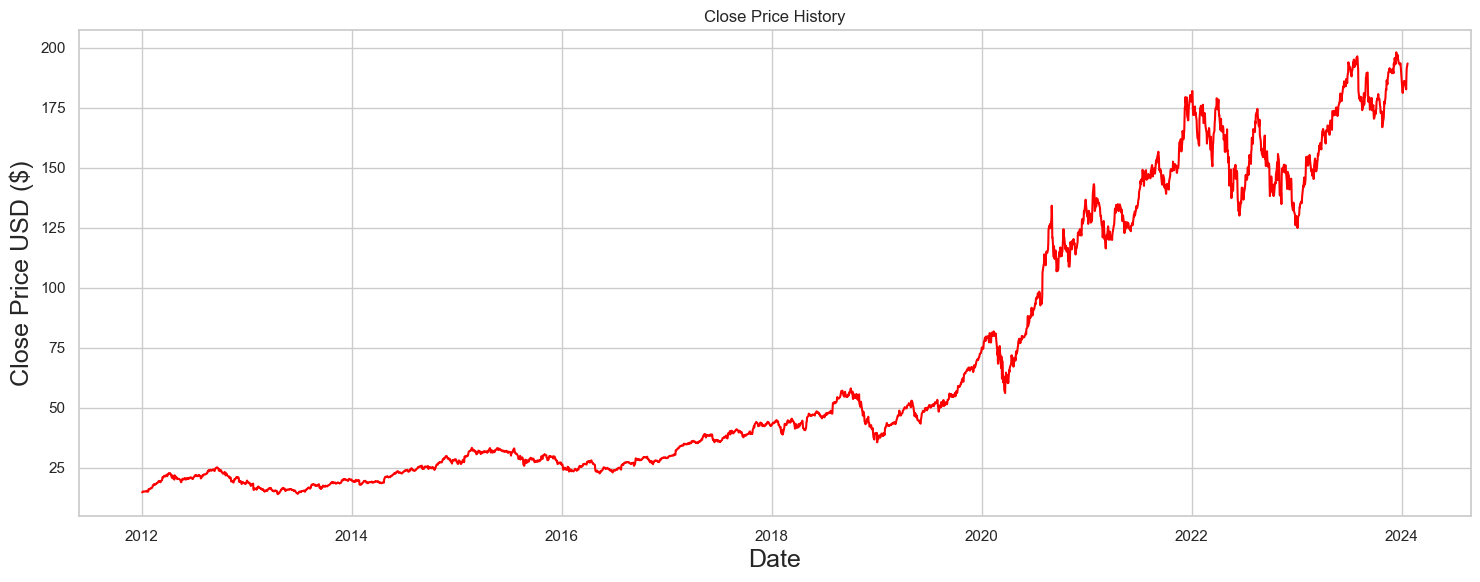

In [18]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [19]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len


2881

In [20]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler with feature_range=(0,1).
# Use the fit_transform method to scale the 'dataset'.
# Store the scaled data in the variable 'scaled_data'
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.94852375],
       [0.96443357],
       [0.97485913]])

In [ ]:
# Create the training data set. from now you have to do most of the coding . ENJOY

In [21]:
# 1. Create the training data set by extracting the initial part of 'scaled_data' (up to 'training_data_len').
# 2. Split the training data into 'x_train' and 'y_train' data sets.
  # a. Iterate over the range from 60 to the length of 'train_data'.
  # b. For each iteration, append the previous 60 data points to 'x_train' and the next data point to 'y_train'.
  # c. Print 'x_train', 'y_train', and an empty line if i is less than or equal to 61.

# 3. Convert 'x_train' and 'y_train' to numpy arrays.
# 4. Reshape 'x_train' to have three dimensions: (number of samples, time steps, features) using np.reshape().
#    a. The shape should be (x_train.shape[0], x_train.shape[1], 1).

train_data = scaled_data[0:int(training_data_len), :]

#splitting
x_train, y_train = [], []
for i in range(60, len(train_data)):
  
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    
    if i <= 61:
        print(f'x_train: {x_train}')
        print(f'y_train: {y_train}\n')


x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train: [array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
y_train: [0.042534249860459186]

x_train: [array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       

In [22]:
# 1. Import the Sequential model and layers from Keras.
# 2. Build the LSTM model using the Sequential API.
#   a. Add an LSTM layer with 128 units and return_sequences=True, specifying input_shape=(x_train.shape[1], 1).
#   b. Add another LSTM layer with 64 units and return_sequences=False.
#   c. Add a Dense layer with 25 units.
#   d. Add a final Dense layer with 1 unit.
   
# 3. Compile the model using 'adam' optimizer and 'mean_squared_error' loss.
# 4. Train the model using x_train and y_train with a batch size of 1 and 1 epoch.


from keras.models import Sequential
from keras.layers import LSTM, Dense


model = Sequential()

model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))

model.add(LSTM(units=64, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)





2821/2821 [==============================] - 81s 27ms/step - loss: 0.0011


In [25]:
# 1. Create the testing data set by extracting the portion of 'scaled_data' from index 'training_data_len - 60' to the end.
# 2. Create 'x_test' by iterating over 'test_data' and appending the previous 60 data points.
# 3. Convert 'x_test' to a numpy array.
# 4. Reshape 'x_test' to have three dimensions: (number of samples, time steps, features) using np.reshape().
 #  a. The shape should be (x_test.shape[0], x_test.shape[1], 1).

# 5. Use the trained model to predict the stock prices on the testing data ('x_test').
# 6. Inverse transform the scaled predictions to get the actual stock prices using scaler.inverse_transform().
# 7. Calculate the root mean squared error (RMSE) between the predicted and actual prices.


test_data = scaled_data[training_data_len - 60:]


x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_pred = model.predict(x_test)

y_pred = scaler.inverse_transform(y_pred)

test_data = scaler.inverse_transform(test_data)

rmse = np.sqrt(np.mean(y_pred - test_data[60:] ** 2))
print("Root Mean Squared Error :", rmse)


5/5 [==============================] - 0s 29ms/step
Root Mean Squared Error : nan


C:\Users\Dell\AppData\Local\Temp\ipykernel_2648\3988153411.py:30: RuntimeWarning: invalid value encountered in sqrt
  rmse = np.sqrt(np.mean(y_pred - test_data[60:] ** 2))


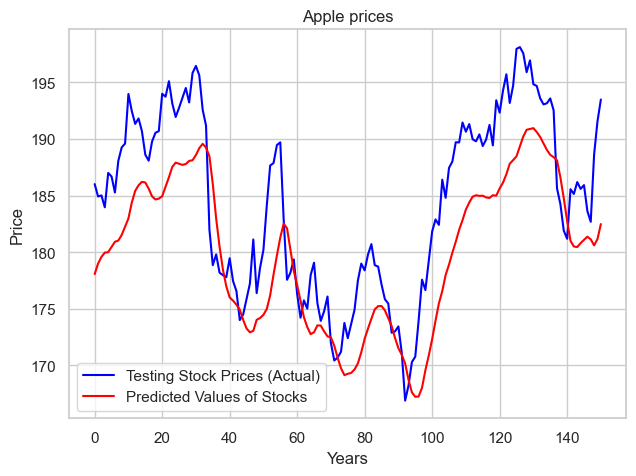

In [24]:
plt.plot(test_data[60:,0],label='Testing Stock Prices (Actual)', color='blue')
plt.plot(y_pred,label='Predicted Values of Stocks', color='red')
plt.title('Apple prices')
plt.xlabel('Years')
plt.ylabel('Price')

plt.legend()
plt.show()

Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

How to load stock market data from the YAHOO Finance website using yfinance.
How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
How to measure the correlation between stocks.
How to measure the risk of investing in a particular stock.